# Illustration de la décomposition sur polynômes de Laguerre
par Pauline Guntzburger, Lucie Van Nieuwenhuyze et Alban Gossard

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols, diff, exp, factorial, simplify, expand
import sympy as sp

Affichage graphique

In [2]:
def plot(x,y, t=None):
    fig_kw={'figsize':(13,6)}
    f, (ax1, ax2) = plt.subplots(1, 2, **fig_kw)
    """ax1.set_xlim([-1,10])
    ax1.set_ylim([-1,10])"""
    ax1.plot(x, y)
    ax1.set_title('y=f(x)')
    if t is None:
        ax2.plot(x, color='red', label='x')
        ax2.plot(y, color='green', label='y')
        ax2.set_title('Evolution des variables au cours des itérations')
    else:
        ax2.plot(t, x, color='red', label='x')
        ax2.plot(t, y, color='green', label='y')
        ax2.set_title('Evolution des variables au cours du temps')
    plt.legend()
    plt.show()

Fonctions de calcul des produits scalaires, produits scalaires pondérés d'ordre 1 et produits croisés à 3 termes

# Préparation des polynômes et de la discrétisation

In [3]:
npts_ps=3000000
sup_ps=100.
def scalar_product(Lj,Lk):
    alpha=np.linspace(0.,sup_ps,npts_ps)
    dalpha=(alpha[-1]-alpha[0])/(alpha.shape[0]-1)
    tmp=np.sum(Lj(alpha)*Lk(alpha)*np.exp(-alpha))*dalpha
    del alpha
    return tmp
def scalar_product_1st_momentum(Lj,Lk):
    alpha=np.linspace(0.,sup_ps,npts_ps)
    dalpha=(alpha[-1]-alpha[0])/(alpha.shape[0]-1)
    tmp=np.sum(alpha*Lj(alpha)*Lk(alpha)*np.exp(-alpha))*dalpha
    del alpha
    return tmp
def scalar_product_3_terms(Li,Lj,Lk):
    alpha=np.linspace(0.,sup_ps,npts_ps)
    dalpha=(alpha[-1]-alpha[0])/(alpha.shape[0]-1)
    tmp=np.sum(Li(alpha)*Lj(alpha)*Lk(alpha)*np.exp(-alpha))*dalpha
    del alpha
    return tmp

Calcul analytique de l'expression de la base des polynômes de Laguerre

In [4]:
def phi(x,n):
    return(exp(-x)*x**n )
def Laguerre(n):
    P = 1/factorial(n)*exp(X)*diff(phi(X,n),X,n)
    return(expand(simplify(P)))
X = sp.symbols('X')
for i in range(10):
    a=Laguerre(i)
    print('L'+str(i),' : ',a)

L0  :  1
L1  :  -X + 1
L2  :  X**2/2 - 2*X + 1
L3  :  -X**3/6 + 3*X**2/2 - 3*X + 1
L4  :  X**4/24 - 2*X**3/3 + 3*X**2 - 4*X + 1
L5  :  -X**5/120 + 5*X**4/24 - 5*X**3/3 + 5*X**2 - 5*X + 1
L6  :  X**6/720 - X**5/20 + 5*X**4/8 - 10*X**3/3 + 15*X**2/2 - 6*X + 1
L7  :  -X**7/5040 + 7*X**6/720 - 7*X**5/40 + 35*X**4/24 - 35*X**3/6 + 21*X**2/2 - 7*X + 1
L8  :  X**8/40320 - X**7/630 + 7*X**6/180 - 7*X**5/15 + 35*X**4/12 - 28*X**3/3 + 14*X**2 - 8*X + 1
L9  :  -X**9/362880 + X**8/4480 - X**7/140 + 7*X**6/60 - 21*X**5/20 + 21*X**4/4 - 14*X**3 + 18*X**2 - 9*X + 1


Visualisation des polynômes

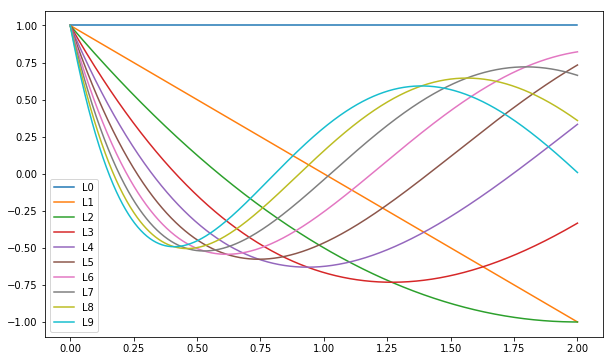

In [5]:
def L0(X):
    return X*0.+1.
def L1(X):
    return (-X + 1.)
def L2(X):
    return (X**2./2. - 2.*X + 1.)
def L3(X):
    return (-X**3./6. + 3.*X**2./2. - 3.*X + 1.)
def L4(X):
    return (X**4./24. - 2.*X**3./3. + 3.*X**2. - 4.*X + 1.)
def L5(X):
    return -X**5/120 + 5*X**4/24 - 5*X**3/3 + 5*X**2 - 5*X + 1
def L6(X):
    return X**6/720 - X**5/20 + 5*X**4/8 - 10*X**3/3 + 15*X**2/2 - 6*X + 1
def L7(X):
    return -X**7/5040 + 7*X**6/720 - 7*X**5/40 + 35*X**4/24 - 35*X**3/6 + 21*X**2/2 - 7*X + 1
def L8(X):
    return X**8/40320 - X**7/630 + 7*X**6/180 - 7*X**5/15 + 35*X**4/12 - 28*X**3/3 + 14*X**2 - 8*X + 1
def L9(X):
    return -X**9/362880 + X**8/4480 - X**7/140 + 7*X**6/60 - 21*X**5/20 + 21*X**4/4 - 14*X**3 + 18*X**2 - 9*X + 1
def L(k):
    if k==0:
        return L0
    elif k==1:
        return L1
    elif k==2:
        return L2
    elif k==3:
        return L3
    elif k==4:
        return L4
    elif k==5:
        return L5
    elif k==6:
        return L6
    elif k==7:
        return L7
    elif k==8:
        return L8
    elif k==9:
        return L9
    else:
        raise ValueError('not implemented yet')

plt.figure(figsize=(10,6))
x=np.linspace(0.,2.,1000)
for k in range(10):
    plt.plot(x,L(k)(x),label='L'+str(k))
plt.legend()
#plt.tight_layout()
#plt.savefig('pol_Laguerre.png',dpi=300)
plt.show()

### Vérification de l'orthonormalité

In [6]:
N=10
for k in range(N):
    print('------')
    for l in range(k+1):
        print('\t<L'+str(k)+',L'+str(l)+'>='+str(scalar_product(L(k),L(l))))

------
	<L0,L0>=1.00001666676
------
	<L1,L0>=1.66668574075e-05
	<L1,L1>=1.00001666695
------
	<L2,L0>=1.66669500002e-05
	<L2,L1>=1.66670425928e-05
	<L2,L2>=1.00001666714
------
	<L3,L0>=1.66670425928e-05
	<L3,L1>=1.66671351854e-05
	<L3,L2>=1.66672277781e-05
	<L3,L3>=1.00001666732
------
	<L4,L0>=1.66671351855e-05
	<L4,L1>=1.66672277781e-05
	<L4,L2>=1.66673203708e-05
	<L4,L3>=1.66674129636e-05
	<L4,L4>=1.00001666751
------
	<L5,L0>=1.66672277782e-05
	<L5,L1>=1.66673203708e-05
	<L5,L2>=1.66674129634e-05
	<L5,L3>=1.66675055562e-05
	<L5,L4>=1.66675981488e-05
	<L5,L5>=1.00001666769
------
	<L6,L0>=1.66673203708e-05
	<L6,L1>=1.66674129635e-05
	<L6,L2>=1.6667505556e-05
	<L6,L3>=1.66675981488e-05
	<L6,L4>=1.66676907415e-05
	<L6,L5>=1.66677833342e-05
	<L6,L6>=1.00001666788
------
	<L7,L0>=1.66674129635e-05
	<L7,L1>=1.66675055561e-05
	<L7,L2>=1.66675981488e-05
	<L7,L3>=1.66676907414e-05
	<L7,L4>=1.66677833341e-05
	<L7,L5>=1.66678759266e-05
	<L7,L6>=1.66679685196e-05
	<L7,L7>=1.00001666806
-----

# Résolution déterministe

On calcule une fois pour toute les différents produits en raison du temps de calcul

In [8]:
N=5

print('computing scalar products')
tab_scalar_product=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        tab_scalar_product[i,j]=scalar_product(L(j),L(i))
print('computing 1st order momentum')
tab_scalar_product_1st_momentum=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        tab_scalar_product_1st_momentum[i,j]=scalar_product_1st_momentum(L(j),L(i))
print('computing product 3 terms')
tab_scalar_product_3_terms=np.zeros((N,N,N))
for i in range(N):
    for j in range(N):
        for k in range(N):
            tab_scalar_product_3_terms[i,j,k]=scalar_product_3_terms(L(i),L(j),L(k))

computing scalar products
computing 1st order momentum
computing product 3 terms


Il est possible de vérifier que la discrétisation des différents produits est suffisamment fine en calculant les solutions ci-après avec les valeurs théoriques des produits et en vérifiant que les solutions obtenues sont les mêmes.

In [ ]:
print(tab_scalar_product)
print(tab_scalar_product_1st_momentum)
print(tab_scalar_product_3_terms)

In [ ]:
tab_scalar_product_trunc=np.eye(N)
tab_scalar_product_1st_momentum_trunc=np.array([[1,-1,0,0],[-1,3,-2,0],[0,-2,5,-3],[0,0,-3,7]])
tab_scalar_product_3_terms_trunc=np.array([
    [[1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]],
    
    [[0,1,0,0],
    [1,-2,2,0],
    [0,2,-4,3],
    [0,0,3,-6]],
    
    [[0,0,1,0],
    [0,2,-4,3],
    [1,-4,10,-12],
    [0,3,-12,24]],
    
    [[0,0,0,1],
    [0,0,3,-6],
    [0,3,-12,24],
    [1,-6,24,-56]]
])

In [9]:
tab_scalar_product_trunc=tab_scalar_product
tab_scalar_product_1st_momentum_trunc=tab_scalar_product_1st_momentum
tab_scalar_product_3_terms_trunc=tab_scalar_product_3_terms

Relatif au test de l'exactitude des valeurs des produits calculés

In [ ]:
print(np.sum(tab_scalar_product_trunc-tab_scalar_product))
print(np.sum(tab_scalar_product_1st_momentum_trunc-tab_scalar_product_1st_momentum))
print(np.sum(tab_scalar_product_3_terms_trunc-tab_scalar_product_3_terms))
print("> Checking for symmetry")
for i in range(3):
    for j in range(3):
        for k in range(3):
            if i!=j and i!=k and j!=k:
                print(i,j,k,' : ',np.sum(np.abs(tab_scalar_product_3_terms_trunc.transpose([i,j,k])-tab_scalar_product_3_terms_trunc)))

Test d'une décomposition déterministe

In [10]:
dt=5e-4
T=50.
Nt=int(1+T/dt)
print('Nt=',Nt)

beta=2.
delta=1.
alpha=1.
gamma=1.

N=2

x0=1.
y0=2.


x=np.zeros((Nt,N))
y=np.zeros((Nt,N))
for i in range(N):
    x[0,i]=x0*tab_scalar_product_trunc[0,i]
    y[0,i]=y0*tab_scalar_product_trunc[0,i]

matA=np.copy(tab_scalar_product_1st_momentum_trunc[:N,:N])
matB=np.copy(tab_scalar_product_3_terms_trunc[:N,:N,:N])

taff=-T
for t in range(Nt-1):
    if (t*dt-taff)>(1.):
        taff=t*dt
        print('n=',t,'t=',t*dt)
    x[t+1,:]=x[t,:]+dt*np.dot(matA,x[t,:])-dt*beta*np.dot(np.dot(matB,y[t,:]),x[t,:])
    y[t+1,:]=y[t,:]-dt*np.dot(matA,y[t,:])+dt*delta*np.dot(np.dot(matB,x[t,:]),y[t,:])

    """x_tot=0.
    y_tot=0.
    for k in range(N):
        Lk=L(k)
        x_tot+=x[t+1,k]*Lk(alpha)
        y_tot+=y[t+1,k]*Lk(gamma)
    if x_tot<0:
        x[t+1,:]=0.
    if y_tot<0:
        y[t+1,:]=0."""

Nt= 100001
n= 0 t= 0.0
n= 2001 t= 1.0005
n= 4001 t= 2.0005
n= 6002 t= 3.001
n= 8002 t= 4.001
n= 10003 t= 5.0015
n= 12004 t= 6.002
n= 14005 t= 7.0025
n= 16006 t= 8.003
n= 18007 t= 9.0035
n= 20008 t= 10.004
n= 22009 t= 11.0045
n= 24010 t= 12.005
n= 26011 t= 13.0055
n= 28012 t= 14.006
n= 30013 t= 15.0065
n= 32014 t= 16.007
n= 34015 t= 17.0075
n= 36016 t= 18.008
n= 38017 t= 19.0085
n= 40018 t= 20.009
n= 42019 t= 21.0095
n= 44020 t= 22.01
n= 46021 t= 23.0105
n= 48022 t= 24.011
n= 50023 t= 25.0115
n= 52024 t= 26.012
n= 54025 t= 27.0125
n= 56026 t= 28.013
n= 58027 t= 29.0135
n= 60028 t= 30.014
n= 62029 t= 31.0145
n= 64030 t= 32.015
n= 66031 t= 33.0155
n= 68032 t= 34.016
n= 70033 t= 35.0165
n= 72034 t= 36.017
n= 74035 t= 37.0175
n= 76036 t= 38.018
n= 78037 t= 39.0185
n= 80038 t= 40.019
n= 82039 t= 41.0195
n= 84040 t= 42.02
n= 86041 t= 43.0205
n= 88042 t= 44.021
n= 90043 t= 45.0215
n= 92044 t= 46.022
n= 94045 t= 47.0225
n= 96046 t= 48.023
n= 98047 t= 49.0235


In [11]:
x_tot=np.zeros(Nt)
y_tot=np.zeros(Nt)
for k in range(N):
    Lk=L(k)
    x_tot+=x[:,k]*Lk(alpha)
    y_tot+=y[:,k]*Lk(gamma)

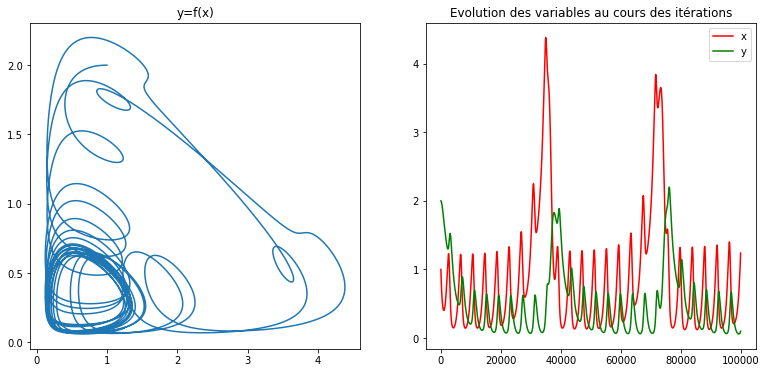

In [12]:
lim=-150
plot(x_tot[:lim],y_tot[:lim])

# Résolutions avec termes aléatoires

## Décomposition pour $N=1$

In [13]:
dt=5e-4
T=50.
Nt=int(1+T/dt)

beta=2.
delta=1.
lambda1=1.
lambda2=1.

N=1

x0=1.
y0=2.

Nsimul=50

list_alpha=np.random.exponential(1./lambda1, size=Nsimul)
list_gamma=np.random.exponential(1./lambda2, size=Nsimul)
list_xT=np.zeros(Nsimul)
list_yT=np.zeros(Nsimul)
list_xCV=np.zeros(Nsimul)
list_yCV=np.zeros(Nsimul)

x_dep=np.zeros((Nt,N))
y_dep=np.zeros((Nt,N))
for i in range(N):
    x_dep[0,i]=x0*tab_scalar_product_trunc[0,i]
    y_dep[0,i]=y0*tab_scalar_product_trunc[0,i]

matA=np.copy(tab_scalar_product_1st_momentum_trunc[:N,:N])
matB=np.copy(tab_scalar_product_3_terms_trunc[:N,:N,:N])

for nsimul in range(Nsimul):

    alpha=list_alpha[nsimul]
    gamma=list_gamma[nsimul]

    x=np.copy(x_dep)
    y=np.copy(y_dep)

    for t in range(Nt-1):
        x[t+1,:]=x[t,:]+dt*np.dot(matA,x[t,:])-dt*beta*np.dot(np.dot(matB,y[t,:]),x[t,:])
        y[t+1,:]=y[t,:]-dt*np.dot(matA,y[t,:])+dt*delta*np.dot(np.dot(matB,x[t,:]),y[t,:])

    x_tot=np.zeros(Nt)
    y_tot=np.zeros(Nt)
    for k in range(N):
        Lk=L(k)
        x_tot+=x[:,k]*Lk(alpha)
        y_tot+=y[:,k]*Lk(gamma)
        
    list_xT[nsimul]=np.sum(x_tot)*dt/T
    list_yT[nsimul]=np.sum(y_tot)*dt/T
    
    list_xCV[nsimul]=gamma/delta
    list_yCV[nsimul]=alpha/beta
    
    if nsimul%(5)==0:
        print('nsimul=',nsimul)

nsimul= 0
nsimul= 5
nsimul= 10
nsimul= 15
nsimul= 20
nsimul= 25
nsimul= 30
nsimul= 35
nsimul= 40
nsimul= 45


In [14]:
Ex=np.sum(list_xT)/list_xT.shape[0]
Ey=np.sum(list_yT)/list_yT.shape[0]
E_valx_CV=np.sum(list_xCV)/list_xCV.shape[0]
E_valy_CV=np.sum(list_yCV)/list_yCV.shape[0]
Varx=np.sum((list_xT-Ex)**2.)/list_xT.shape[0]
Vary=np.sum((list_yT-Ey)**2.)/list_yT.shape[0]
Nalpha2=1.96
ICx=[Ex-np.sqrt(Varx)*Nalpha2/np.sqrt(Nsimul), Ex+np.sqrt(Varx)*Nalpha2/np.sqrt(Nsimul)]
ICy=[Ey-np.sqrt(Vary)*Nalpha2/np.sqrt(Nsimul), Ey+np.sqrt(Vary)*Nalpha2/np.sqrt(Nsimul)]


print('################')
print("x(s)")
print("E(f(x))=",Ex)
print('Var(f(x))='+str(Varx))
print("E(gamma/delta)=",E_valx_CV)
print('IC(E(f(x)))='+str(ICx))
print('################')
print("y(s)")
print("E(f(y))=",Ey)
print('Var(f(y))='+str(Vary))
print("E(alpha/beta)=",E_valy_CV)
print('IC(E(f(y)))='+str(ICy))


################
x(s)
E(f(x))= 0.97850579548
Var(f(x))=1.23259516441e-32
E(gamma/delta)= 1.03597691849
IC(E(f(x)))=[0.97850579547951666, 0.97850579547951666]
################
y(s)
E(f(y))= 0.525031263731
Var(f(y))=0.0
E(alpha/beta)= 0.367161353047
IC(E(f(y)))=[0.5250312637310075, 0.5250312637310075]


## Décomposition pour $N=2$

In [15]:
dt=5e-4
T=50.
Nt=int(1+T/dt)

beta=2.
delta=1.
lambda1=1.
lambda2=1.

N=2

x0=1.
y0=2.

Nsimul=50

list_alpha=np.random.exponential(1./lambda1, size=Nsimul)
list_gamma=np.random.exponential(1./lambda2, size=Nsimul)
list_xT=np.zeros(Nsimul)
list_yT=np.zeros(Nsimul)
list_xCV=np.zeros(Nsimul)
list_yCV=np.zeros(Nsimul)

x_dep=np.zeros((Nt,N))
y_dep=np.zeros((Nt,N))
for i in range(N):
    x_dep[0,i]=x0*tab_scalar_product_trunc[0,i]
    y_dep[0,i]=y0*tab_scalar_product_trunc[0,i]

matA=np.copy(tab_scalar_product_1st_momentum_trunc[:N,:N])
matB=np.copy(tab_scalar_product_3_terms_trunc[:N,:N,:N])

for nsimul in range(Nsimul):

    alpha=list_alpha[nsimul]
    gamma=list_gamma[nsimul]

    x=np.copy(x_dep)
    y=np.copy(y_dep)

    for t in range(Nt-1):
        x[t+1,:]=x[t,:]+dt*np.dot(matA,x[t,:])-dt*beta*np.dot(np.dot(matB,y[t,:]),x[t,:])
        y[t+1,:]=y[t,:]-dt*np.dot(matA,y[t,:])+dt*delta*np.dot(np.dot(matB,x[t,:]),y[t,:])

    x_tot=np.zeros(Nt)
    y_tot=np.zeros(Nt)
    for k in range(N):
        Lk=L(k)
        x_tot+=x[:,k]*Lk(alpha)
        y_tot+=y[:,k]*Lk(gamma)
        
    list_xT[nsimul]=np.sum(x_tot)*dt/T
    list_yT[nsimul]=np.sum(y_tot)*dt/T
    
    list_xCV[nsimul]=gamma/delta
    list_yCV[nsimul]=alpha/beta
    
    if nsimul%(5)==0:
        print('nsimul=',nsimul)

nsimul= 0
nsimul= 5
nsimul= 10
nsimul= 15
nsimul= 20
nsimul= 25
nsimul= 30
nsimul= 35
nsimul= 40
nsimul= 45


In [16]:
Ex=np.sum(list_xT)/list_xT.shape[0]
Ey=np.sum(list_yT)/list_yT.shape[0]
E_valx_CV=np.sum(list_xCV)/list_xCV.shape[0]
E_valy_CV=np.sum(list_yCV)/list_yCV.shape[0]
Varx=np.sum((list_xT-Ex)**2.)/list_xT.shape[0]
Vary=np.sum((list_yT-Ey)**2.)/list_yT.shape[0]
Nalpha2=1.96
ICx=[Ex-np.sqrt(Varx)*Nalpha2/np.sqrt(Nsimul), Ex+np.sqrt(Varx)*Nalpha2/np.sqrt(Nsimul)]
ICy=[Ey-np.sqrt(Vary)*Nalpha2/np.sqrt(Nsimul), Ey+np.sqrt(Vary)*Nalpha2/np.sqrt(Nsimul)]


print('################')
print("x(s)")
print("E(f(x))=",Ex)
print('Var(f(x))='+str(Varx))
print("E(gamma/delta)=",E_valx_CV)
print('IC(E(f(x)))='+str(ICx))
print('################')
print("y(s)")
print("E(f(y))=",Ey)
print('Var(f(y))='+str(Vary))
print("E(alpha/beta)=",E_valy_CV)
print('IC(E(f(y)))='+str(ICy))


################
x(s)
E(f(x))= 0.499887993913
Var(f(x))=0.387855621964
E(gamma/delta)= 0.872279919317
IC(E(f(x)))=[0.32726203078226013, 0.67251395704307793]
################
y(s)
E(f(y))= 0.447420939142
Var(f(y))=0.157555101286
E(alpha/beta)= 0.31548342914
IC(E(f(y)))=[0.337396971107434, 0.55744490717586193]
